# **Tutorial: Introduction to Inferential Statistics**

Inferential statistics stands as one of the two main branches of statistical methods, with the other being descriptive statistics. While descriptive statistics is concerned with summarizing and understanding data from a given sample, inferential statistics goes a step further to make predictions or inferences about a population based on sample data.

In practical terms, we often want to understand:

- If a treatment A, e.g. a drug, is more effective than a treatment B. e.g. placebo or another drug
- Whether students from different teaching methods show different levels of understanding.
- If changes in a company's strategy lead to significant differences in sales or customer engagement.

Given the impracticality or impossibility of studying entire populations, we rely on samples and inferential statistics.

### **1.Foundations of Inferential Statistics**

1. **Population and Sample**:
    - **Population**: The entire group we're interested in drawing conclusions about.
    - **Sample**: A subset of the population that we actually observe and collect data from. The key is that this sample should be representative of the population.

2. **Parameter and Statistic**:
    - **Parameter**: A numerical value that summarizes or describes an aspect of the population (e.g., population mean, population variance).
    - **Statistic**: A numerical value that summarizes or describes an aspect of a sample (e.g., sample mean, sample variance).

### **Goals of Inferential Statistics**

1. **Estimation**: We often want to estimate population parameters. Two main types of estimation are:
    - **Point Estimation**: Providing a single "best guess" of some population parameter.
    - **Interval Estimation**: Providing a range of values that might contain the population parameter.

2. **Hypothesis Testing**: Used to compare a data-driven claim or hypothesis about a population parameter against an existing claim or status quo.

### **Key Concepts**

1. **Null Hypothesis ($ H_0 $)**: The status quo or default claim, often positing that there's no effect or no difference.
  
2. **Alternative Hypothesis ($ H_a $ or $ H_1 $)**: The claim that the analysis seeks to test against the null hypothesis.

3. **p-value**: The probability of observing a test statistic as extreme as, or more extreme than, the statistic computed from a sample, given that the null hypothesis is true. In simpler terms, it measures how consistent our observed data is with the null hypothesis.

4. **Significance Level ($ \alpha $)**: A predetermined threshold (often 0.05) below which the p-value is considered significant, leading to the rejection of the null hypothesis.

5. **Confidence Interval**: A range of values used to estimate the true population parameter. It's associated with a confidence level that quantifies the level of confidence that the parameter lies within the interval.

6. **Errors in Hypothesis Testing**:
    - **Type I Error (or false positive)**: Rejecting the null hypothesis when it's actually true, e.g., you tell a patient that he has cancer while it doesn't have it.
    - **Type II Error (or false negative)**: Failing to reject the null hypothesis when the alternative hypothesis is true, e.g. you tell a patient that he doens't have cancer while it has it.

### **Assumptions and Conditions**

Inferential methods often come with assumptions. Some of these might include:
- **Normality**: Assumes that the data follows a normal distribution.
- **Independence**: Assumes that each data point is independent of others.
- **Homogeneity of Variance**: Assumes that different groups have the same variance.

### **Commonly Used Statistical Tests**

1. **T-tests**: Compare the means of two groups.
2. **ANOVA (Analysis of Variance)**: Compare means across more than two groups.
3. **Chi-squared tests**: Used for categorical data to see if observed frequencies match expected frequencies.
4. **Regression analysis**: Determine the strength and character of the relationship between one dependent variable and one or more independent variables.

## **2.Sampling Distribution**

A sampling distribution is the probability distribution of a given statistic based on a random sample. Let's dive into it step by step:

1. Start with a population $ P $ with some parameter, say mean $ \mu $ and standard deviation $ \sigma $.

2. Take a sample $ S $ of size $ n $ from $ P $ and compute a sample statistic (e.g., the sample mean $ \bar{x} $).

3. Repeat the sampling process many times and compute the sample statistic each time.

4. The distribution of this statistic is the sampling distribution. For the sample mean, this is often called the sampling distribution of the mean.

Let's assume a non-normal population distribution: a bimodal distribution consisting of values from two different normal distributions. We'll then draw multiple samples, compute their means, and plot the resulting sampling distribution of the mean.

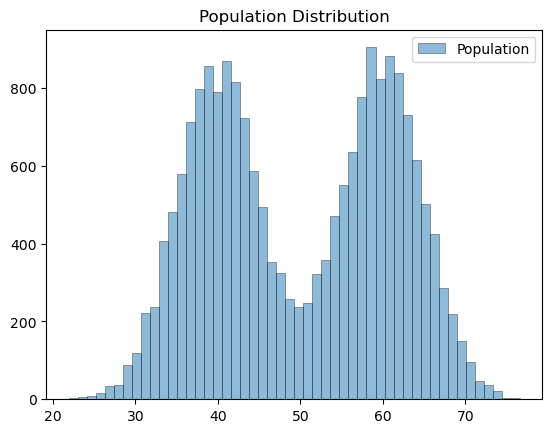

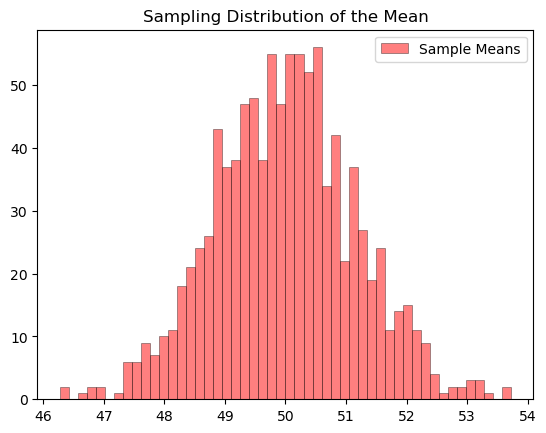

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Create a bimodal distribution (combining two normal distributions)
population = np.concatenate([np.random.normal(40, 5, 10000), np.random.normal(60, 5, 10000)])

# Draw the population distribution
plt.hist(population, bins=50, alpha=0.5, edgecolor='black', linewidth=0.5, label="Population")
plt.title("Population Distribution")
plt.legend()
plt.show()

# Draw multiple samples and compute their means
sample_means = [np.mean(np.random.choice(population, 100)) for _ in range(1000)]

# Plot the sampling distribution of the mean
plt.hist(sample_means, bins=50, color='red', alpha=0.5, edgecolor='black', linewidth=0.5, label="Sample Means")
plt.title("Sampling Distribution of the Mean")
plt.legend()
plt.show()

## **3. Central Limit Theorem (CLT)**

If you have a population with any shape of distribution (it could be uniform, bimodal, skewed, etc.) with a known mean $ \mu $ and a known standard deviation $ \sigma $, and you take sufficiently large random samples from this population with replacement, then the distribution of the sample means will be approximately normally distributed. This will hold true regardless of the shape of the original population distribution.

Mathematically, for a sufficiently large sample size $ n $, the sampling distribution of the sample mean $ \bar{x} $ will be approximately normal. The mean of this sampling distribution will be equal to the population mean, $ \mu $, and its standard deviation (often termed the standard error, SE) is given by:

$$ SE = \frac{\sigma}{\sqrt{n}} $$

Where:
- $ \mu $ is the population mean.
- $ \sigma $ is the standard deviation of the population.
- $ n $ is the sample size.

This resulting normal distribution has a special name: the standard normal distribution or the z-distribution.

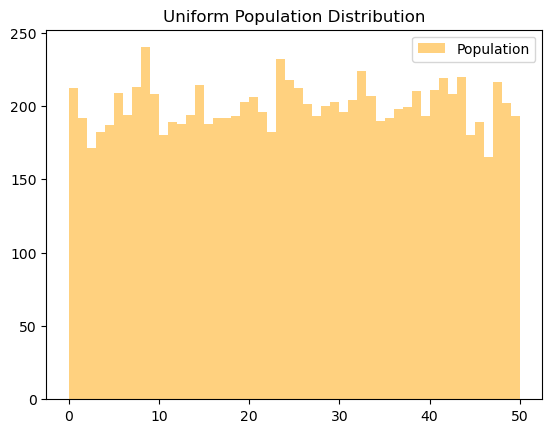

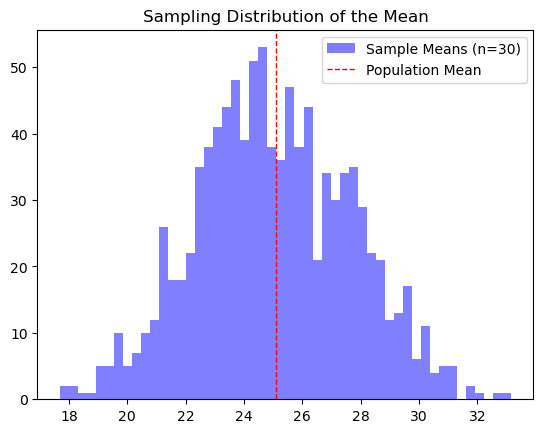

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Define a uniform population between 0 and 50
population = np.random.uniform(0, 50, 10000)

# Draw the population distribution
plt.hist(population, bins=50, alpha=0.5, label="Population", color="orange")
plt.title("Uniform Population Distribution")
plt.legend()
plt.show()

# Draw multiple samples and compute their means
sample_size = 30
sample_means = [np.mean(np.random.choice(population, sample_size)) for _ in range(1000)]

# Plot the sampling distribution of the mean
plt.hist(sample_means, bins=50, alpha=0.5, color='blue', label="Sample Means (n=30)")
plt.title("Sampling Distribution of the Mean")
plt.axvline(np.mean(population), color='red', linestyle='dashed', linewidth=1, label="Population Mean")
plt.legend()
plt.show()

### **4.Interval Estimation**

Interval estimation provides a range of plausible values for an unknown parameter. This range is constructed such that it captures the true parameter value with a certain confidence level. The interval estimation is more informative than a point estimate because it provides a measure of the estimation's uncertainty.

The most common form of interval estimation is the **confidence interval**.

#### **5.Computing the Confidence Interval**

To estimate the interval within which we expect the population mean to lie, with a certain level of confidence, we use the formula for the confidence interval:

$$ CI = \bar{x} \pm Z \times \left( \frac{\sigma}{\sqrt{n}} \right) $$

Where:
- $ CI $ represents the confidence interval.
- $ \bar{x} $ is the sample mean.
- $ Z $ is the Z-score (a value that indicates the number of standard deviations from the mean, and is dependent on the desired confidence level).
- $ \sigma $ is the known population standard deviation.
- $ n $ is the sample size.

Given our data:
- $ \bar{x} $ = 175 cm (sample mean height)
- $ \sigma $ = 8 cm (known population standard deviation)
- $ n $ = 100 (sample size)
- Z-score for a 95% confidence level, $ Z $ = 1.96

Plugging these values into our formula:

$$ CI = 175 \pm 1.96 \times \left( \frac{8}{10} \right) $$

This gives us a confidence interval of approximately (173.12, 176.88) cm. This means that, based on our sample, we are 95% confident that the average height of all adult males in the city lies between 173.12 cm and 176.88 cm.

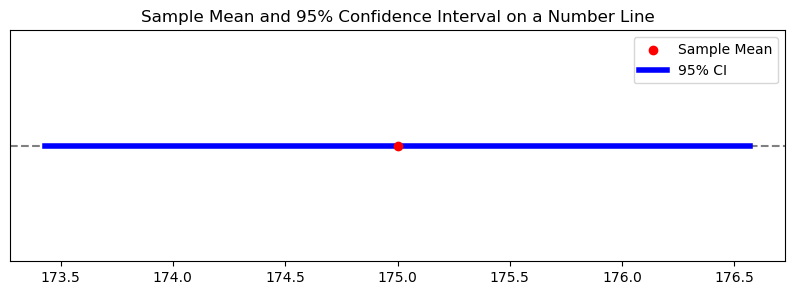

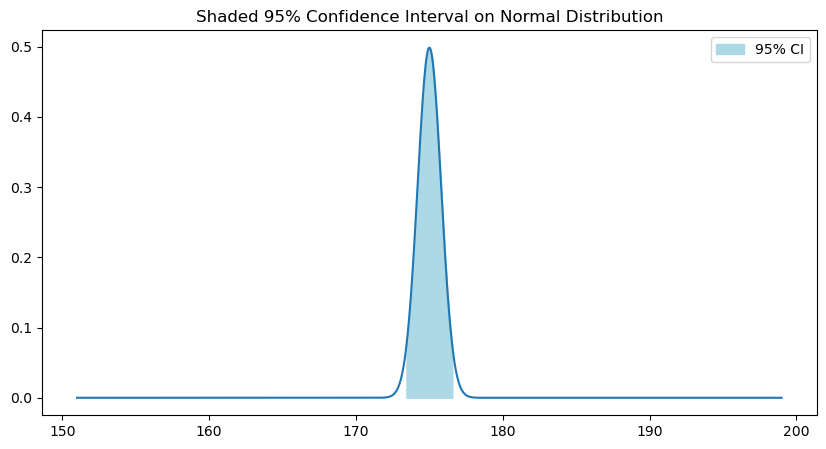

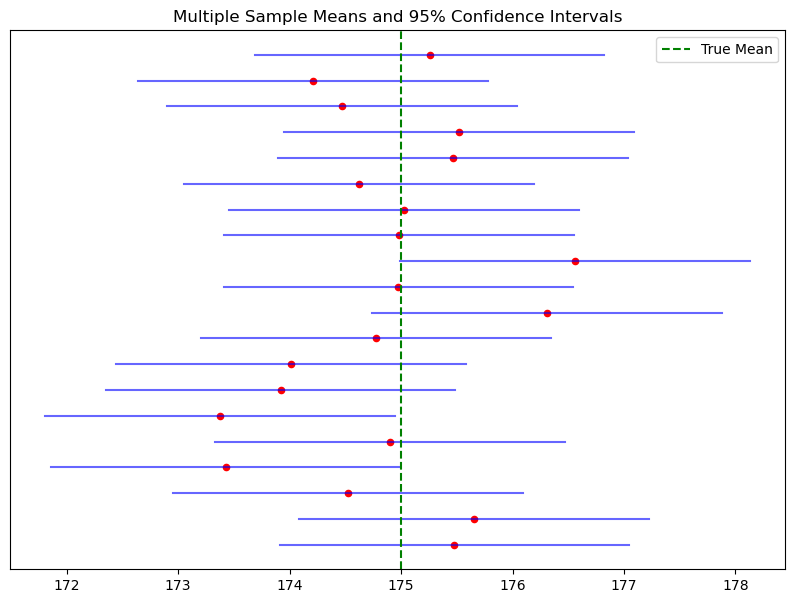

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Given Data
sample_mean = 175
population_std = 8
sample_size = 100
z = 1.96  # Z-score for 95% confidence

# Calculate the Confidence Interval
margin_of_error = z * (population_std/np.sqrt(sample_size))
conf_interval = (sample_mean - margin_of_error, sample_mean + margin_of_error)

# Plot 1: Sample Mean and Confidence Interval on a Number Line
plt.figure(figsize=(10,3))
plt.axhline(y=1, color='grey', linestyle='--')
plt.scatter(sample_mean, 1, color='red', label='Sample Mean', zorder=5)
plt.plot([conf_interval[0], conf_interval[1]], [1, 1], color='blue', lw=4, label='95% CI', zorder=4)
plt.yticks([])
plt.title("Sample Mean and 95% Confidence Interval on a Number Line")
plt.legend()
plt.show()

# Plot 2: Shaded Normal Distribution Curve
plt.figure(figsize=(10,5))
x = np.linspace(sample_mean - 3*population_std, sample_mean + 3*population_std, 1000)
y = stats.norm.pdf(x, sample_mean, population_std/np.sqrt(sample_size))
plt.plot(x, y)
plt.fill_between(x, y, where=((x > conf_interval[0]) & (x < conf_interval[1])), color='lightblue', label='95% CI')
plt.title("Shaded 95% Confidence Interval on Normal Distribution")
plt.legend()
plt.show()

# Plot 3: Multiple Sample Intervals (Simulating 20 sample intervals for demonstration)
plt.figure(figsize=(10,7))
np.random.seed(0)
for i in range(20):
    sample = np.random.normal(sample_mean, population_std, sample_size)
    sample_mean_i = np.mean(sample)
    conf_interval_i = (sample_mean_i - margin_of_error, sample_mean_i + margin_of_error)
    plt.plot([conf_interval_i[0], conf_interval_i[1]], [i, i], color='blue', alpha=0.6)
    plt.scatter(sample_mean_i, i, color='red', s=20)
plt.axvline(x=sample_mean, color='green', linestyle='--', label='True Mean')
plt.yticks([])
plt.title("Multiple Sample Means and 95% Confidence Intervals")
plt.legend()
plt.show()


## **6.Hypothesis Testing**

Hypothesis testing is a systematic method used in statistics to test claims or hypotheses about parameters of a population based on sample data. The primary purpose is to determine the statistical significance of an observation.

### **Key Concepts**

1. **Null Hypothesis $( H_0 )$**: A statement that there is no effect or no difference. It's a default statement we aim to test against.
2. **Alternative Hypothesis $( H_a $ or $ H_1 )$**: A statement that indicates the presence of an effect or difference.
3. **Test Statistic**: A standardized value calculated from sample data to decide whether to reject the null hypothesis.
4. **P-value**: The probability of observing the obtained results, or more extreme, given that the null hypothesis is true. A small p-value suggests that the observed data is inconsistent with the null hypothesis.
5. **Significance Level $( \alpha )$**: A predetermined threshold (often 0.05) against which the p-value is compared. If the p-value is less than $ \alpha $, the null hypothesis is rejected in favor of the alternative.

### **Steps in Hypothesis Testing**

1. **State the Hypotheses**: Formulate the null and alternative hypotheses.
2. **Choose the Significance Level**: Often, $ \alpha $ is set to 0.05.
3. **Select the Appropriate Test and Find the Test Statistic**: Depending on the data and the claim, choose the right statistical test (e.g., t-test, chi-squared test, etc.).
4. **Make a Decision**: Compare the p-value to $ \alpha $. If the p-value is less than $ \alpha $, reject the null hypothesis.

### **Types of Errors**

1. **Type I Error**: Incorrectly rejecting a true null hypothesis (False Positive). The probability of committing a Type I error is $ \alpha $.
2. **Type II Error**: Failing to reject a false null hypothesis (False Negative). The probability of committing a Type II error is denoted by $ \beta $. The power of a test is $ 1 - \beta $, which represents the likelihood of correctly rejecting a false null hypothesis.

### **Visualization**

Hypothesis testing can be visualized using various plots:
- A probability distribution showing the regions under which the null hypothesis would be rejected.
- A p-value plot.
- Power curve to illustrate the probability of rejecting the null hypothesis at various effect sizes.

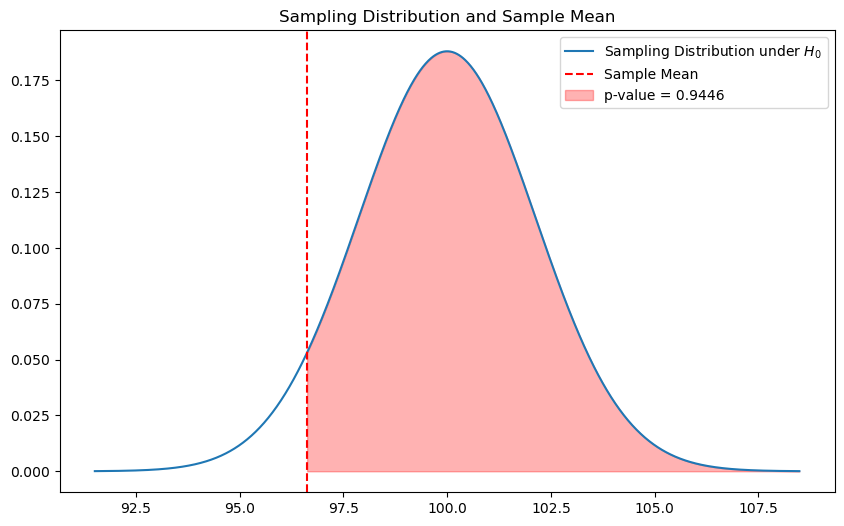

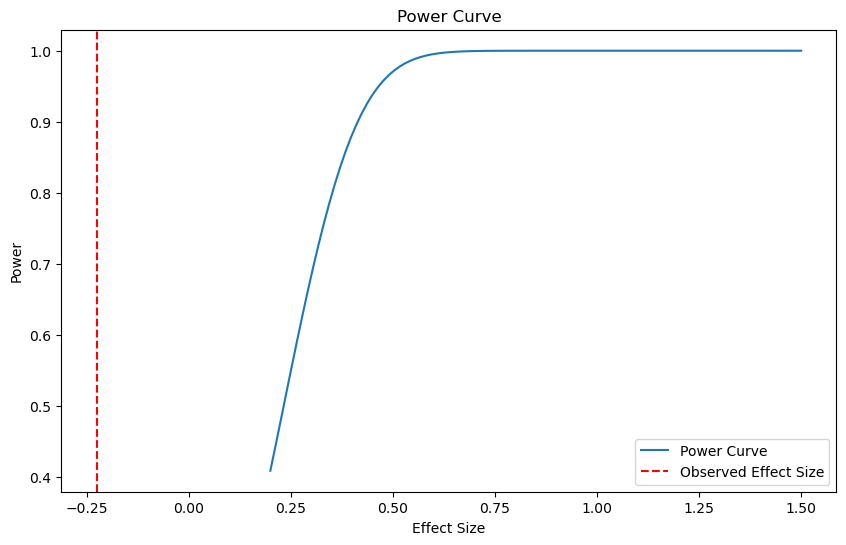

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Simulated data for illustration
np.random.seed(42)
population_mean = 100
population_std = 15
sample_size = 50
sample = np.random.normal(population_mean, population_std, sample_size)

# Assume we want to test if the sample has a mean greater than the population mean
sample_mean = np.mean(sample)
hypothesized_mean = population_mean
std_error = population_std / np.sqrt(sample_size)
z_score = (sample_mean - hypothesized_mean) / std_error
p_value = 1 - stats.norm.cdf(z_score)

# Plot 1: Sample distribution with hypothesized mean
plt.figure(figsize=(10,6))
x = np.linspace(hypothesized_mean - 4*std_error, hypothesized_mean + 4*std_error, 1000)
y = stats.norm.pdf(x, hypothesized_mean, std_error)
plt.plot(x, y, label="Sampling Distribution under $H_0$")
plt.axvline(x=sample_mean, color='red', linestyle='--', label="Sample Mean")
plt.fill_between(x, y, where=(x > sample_mean), color='red', alpha=0.3, label=f"p-value = {p_value:.4f}")
plt.title("Sampling Distribution and Sample Mean")
plt.legend()
plt.show()

# Plot 2: Power curve
effect_sizes = np.linspace(0.2, 1.5, 100)
powers = [1 - stats.norm.cdf(stats.norm.ppf(1 - 0.05) - effect_size*np.sqrt(sample_size)) for effect_size in effect_sizes]
plt.figure(figsize=(10,6))
plt.plot(effect_sizes, powers, label="Power Curve")
plt.axvline(x=(sample_mean - hypothesized_mean)/population_std, color='red', linestyle='--', label="Observed Effect Size")
plt.xlabel("Effect Size")
plt.ylabel("Power")
plt.title("Power Curve")
plt.legend()
plt.show()

## **7. p-value**

It provides a measure to help researchers decide whether to reject a null hypothesis.

### **Definition**

The p-value is the probability of observing a test statistic as extreme as, or more extreme than, the statistic computed from a sample, given that the null hypothesis is true. 

In simpler terms, it measures how consistent our observed data is with the null hypothesis.

### **Interpreting the p-value**

- **Low p-value (typically ≤ 0.05)**: This indicates that the observed data is inconsistent with the null hypothesis. As such, we reject the null hypothesis in favor of the alternative hypothesis. It suggests that the effect observed in the sample data is statistically significant.
  
- **High p-value (typically > 0.05)**: This suggests that the observed data is consistent with the null hypothesis. We do not reject the null hypothesis. It indicates that the effect observed might be due to random chance.

However, the 0.05 threshold is just a convention. Depending on the field of study or the specific test, other thresholds like 0.01 or 0.10 might be used.

### **Misconceptions about the p-value**

1. **It's not the probability that the null hypothesis is true**: A common misconception is thinking that a p-value of 0.05 means there's a 5% chance the null hypothesis is true. This is incorrect. Instead, it's the probability of observing such extreme data if the null hypothesis were true.

2. **It doesn't measure the size of an effect**: A smaller p-value doesn't necessarily mean a larger effect size. It just means that the effect is more statistically significant.

3. **It isn't absolute**: A p-value is a tool, not an absolute measure. Just because a result is "statistically significant" doesn't mean it's "practically significant."

### **Caution**

- **p-hacking**: This refers to the practice of making many tests on data to find patterns, and then only reporting the patterns that reach statistical significance. This can be misleading and can produce false positives.

- **Reproducibility**: Just because a result is statistically significant in one study doesn't mean it will be replicated in another study. It's essential to validate findings with repeated studies and experiments.

### **[Extra] Misconception: Interpreting the p-value as the Probability that the Null Hypothesis is True**

#### **Clarifying the Concept**

The p-value is NOT the probability that the null hypothesis is true. Instead, **p-value** is the probability of observing a test statistic as extreme as, or more extreme than, the one calculated from the sample data, **assuming that the null hypothesis is true**.

In essence, the p-value quantifies how surprising or extreme our observed data is under the assumption that the null hypothesis holds.

#### **An Analogy**

Imagine you have a perfectly fair coin (null hypothesis: the coin is fair), and you flip it 10 times. You end up with 9 heads and 1 tail. Intuitively, this seems quite unusual for a fair coin. 

Now, the p-value in this context would represent the probability of getting 9 heads (or more) in 10 flips assuming the coin is indeed fair. It's not the probability that the coin is fair; it's the probability of seeing such an extreme result given that it's fair.

#### **Why is this Distinction Important?**

Confusing these two probabilities can drastically change the interpretation of results:

- Thinking the p-value is the probability the null hypothesis is true can lead to overconfidence in the null hypothesis when the p-value is high.
- It could also mean underestimating the evidence against the null hypothesis when the p-value is low.

#### **In Practice**

Always remember: a small p-value indicates that the observed data would be rare if the null hypothesis were true. It does not tell us the probability that either the null or alternative hypothesis is true.


## 8. Common Tests in Inferential Statistics
- **t-test**: Compares the means of two groups.
- **Chi-square test**: Tests relationships between categorical variables.
- **ANOVA (Analysis of Variance)**: Compares the means among three or more groups.
- **Regression Analysis**: Assesses the relationship between two or more variables.

## 9. Limitations
- **Sample Size**: Inferential statistics relies on large samples to make accurate inferences.
- **Assumptions**: Most tests have underlying assumptions (e.g., data is normally distributed). Violating these can make results invalid.
- **Bias**: If the sample isn't random, it can introduce bias, making results unrepresentative of the population.